In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
salary_data_train=pd.read_csv("/content/SalaryData_Train(1).csv")

In [4]:
salary_data_train.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
salary_data_train.tail(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30151,32,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
30152,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
30153,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
salary_data_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
salary_data_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
salary_data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
salary_data_test = pd.read_csv("/content/SalaryData_Train(1).csv")

In [10]:
salary_data_test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:
salary_data_test.tail(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30151,32,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
30152,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
30153,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [13]:
salary_data_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
salary_data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
salary_data_train.shape

(30161, 14)

In [16]:
salary_data_test.shape

(30161, 14)

In [17]:
salary_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [18]:
salary_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [20]:
salary_data_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [21]:
salary_data_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [22]:
salary_data_test.corr()

<ipython-input-22-94e601005d09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  salary_data_test.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [23]:
salary_data_train.corr()

<ipython-input-23-b0076a34f5ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  salary_data_train.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [24]:
lb = LabelEncoder()

In [25]:
salary_data_train["workclass"] = lb.fit_transform(salary_data_train["workclass"])
salary_data_train["education"] = lb.fit_transform(salary_data_train["education"])
salary_data_train["maritalstatus"] = lb.fit_transform(salary_data_train["maritalstatus"])
salary_data_train["occupation"] = lb.fit_transform(salary_data_train["occupation"])
salary_data_train["relationship"] = lb.fit_transform(salary_data_train["relationship"])
salary_data_train["race"] = lb.fit_transform(salary_data_train["race"])
salary_data_train["sex"] = lb.fit_transform(salary_data_train["sex"])
salary_data_train["native"] = lb.fit_transform(salary_data_train["native"])
salary_data_train["Salary"] = lb.fit_transform(salary_data_train["Salary"])


In [26]:
salary_data_test["workclass"] = lb.fit_transform(salary_data_test["workclass"])
salary_data_test["education"] = lb.fit_transform(salary_data_test["education"])
salary_data_test["maritalstatus"] = lb.fit_transform(salary_data_test["maritalstatus"])
salary_data_test["occupation"] = lb.fit_transform(salary_data_test["occupation"])
salary_data_test["relationship"] = lb.fit_transform(salary_data_test["relationship"])
salary_data_test["race"] = lb.fit_transform(salary_data_test["race"])
salary_data_test["sex"] = lb.fit_transform(salary_data_test["sex"])
salary_data_test["native"] = lb.fit_transform(salary_data_test["native"])
salary_data_test["Salary"] = lb.fit_transform(salary_data_test["Salary"])


In [27]:
train = salary_data_train.iloc[:2000,:]

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            2000 non-null   int64
 1   workclass      2000 non-null   int64
 2   education      2000 non-null   int64
 3   educationno    2000 non-null   int64
 4   maritalstatus  2000 non-null   int64
 5   occupation     2000 non-null   int64
 6   relationship   2000 non-null   int64
 7   race           2000 non-null   int64
 8   sex            2000 non-null   int64
 9   capitalgain    2000 non-null   int64
 10  capitalloss    2000 non-null   int64
 11  hoursperweek   2000 non-null   int64
 12  native         2000 non-null   int64
 13  Salary         2000 non-null   int64
dtypes: int64(14)
memory usage: 218.9 KB


In [29]:
test = salary_data_test.iloc[:1300,:]

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            1300 non-null   int64
 1   workclass      1300 non-null   int64
 2   education      1300 non-null   int64
 3   educationno    1300 non-null   int64
 4   maritalstatus  1300 non-null   int64
 5   occupation     1300 non-null   int64
 6   relationship   1300 non-null   int64
 7   race           1300 non-null   int64
 8   sex            1300 non-null   int64
 9   capitalgain    1300 non-null   int64
 10  capitalloss    1300 non-null   int64
 11  hoursperweek   1300 non-null   int64
 12  native         1300 non-null   int64
 13  Salary         1300 non-null   int64
dtypes: int64(14)
memory usage: 142.3 KB


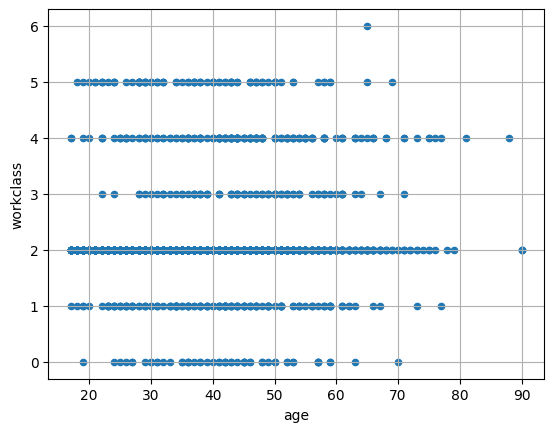

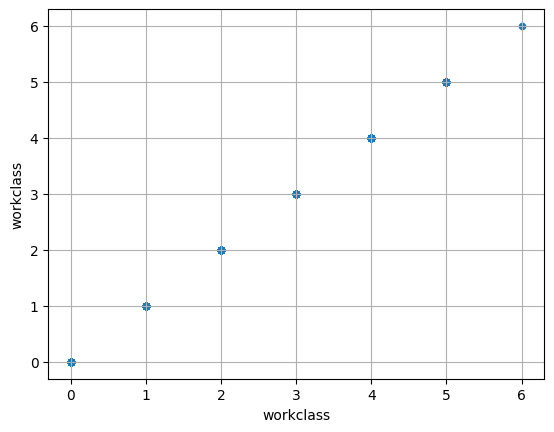

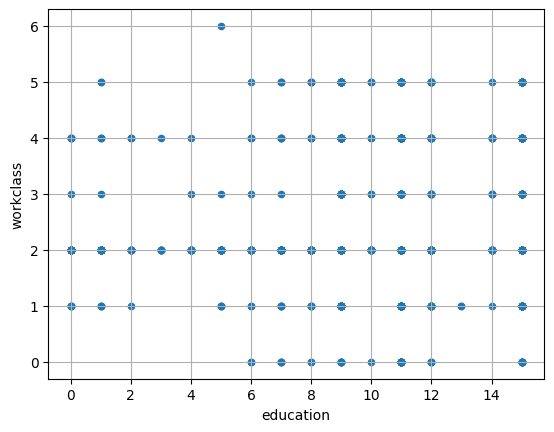

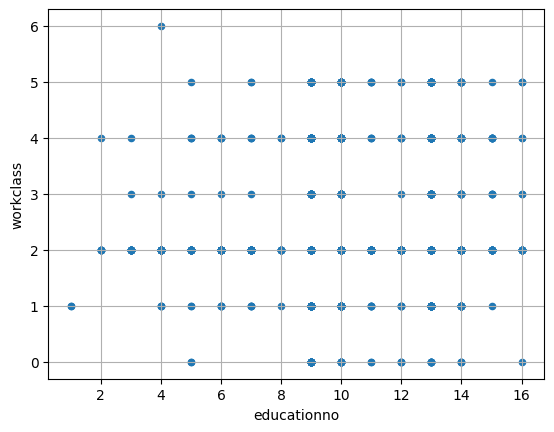

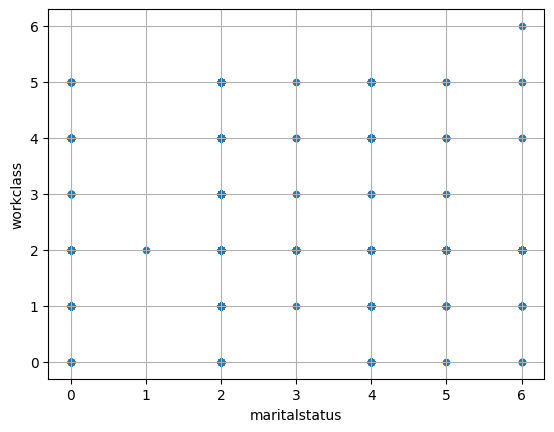

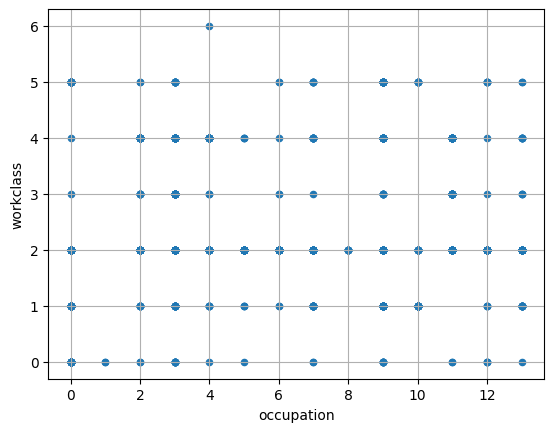

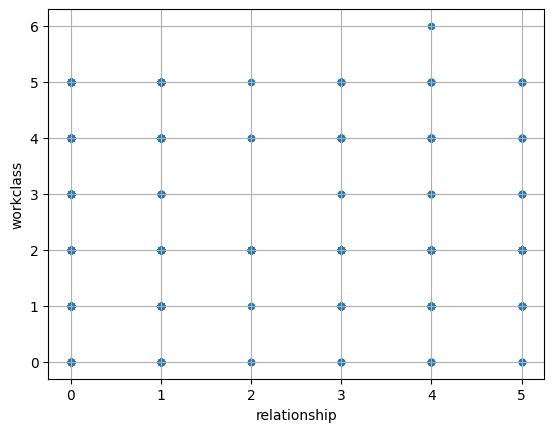

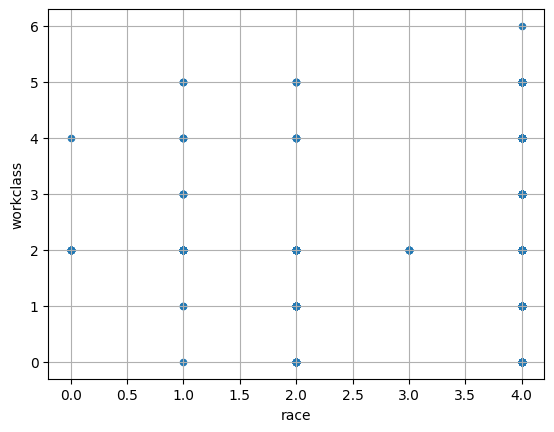

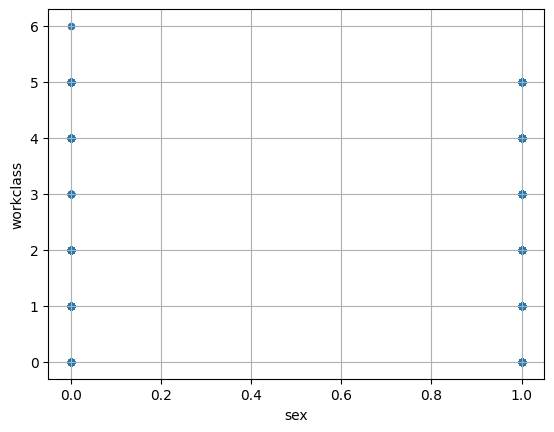

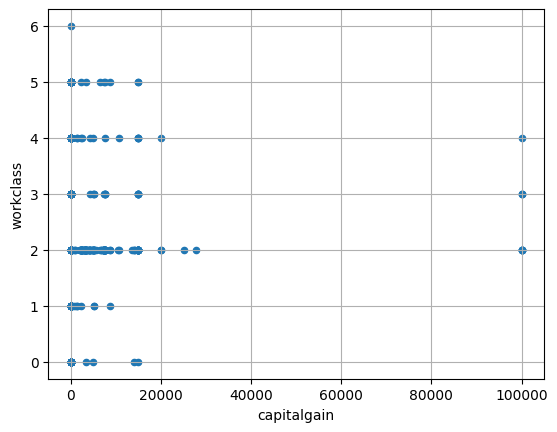

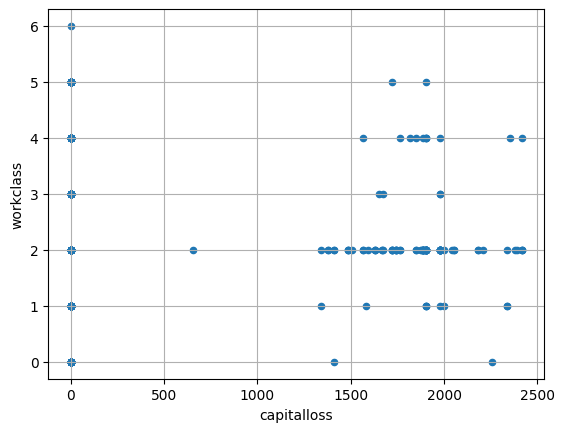

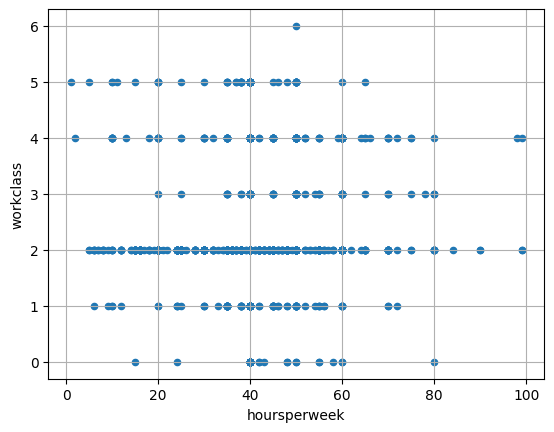

In [32]:
for i in train.describe().columns[:-2]:
  train.plot.scatter(i,'workclass',grid = True)

In [33]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080136,-0.004007,0.014781,-0.249467,-0.004634,-0.216588,0.015168,0.050730,0.081112,0.058997,0.114429,-0.001914,0.231176
workclass,0.080136,1.000000,0.029167,0.068866,-0.043219,0.033209,-0.074186,0.074418,0.087332,0.038314,-0.003069,0.031221,-0.036263,0.064561
education,-0.004007,0.029167,1.000000,0.328746,-0.047668,-0.028564,-0.033833,0.031098,-0.004879,0.035363,0.012082,0.060470,0.085718,0.051282
educationno,0.014781,0.068866,0.328746,1.000000,-0.062303,0.098459,-0.091217,0.075867,0.034123,0.095804,0.062601,0.172302,0.057602,0.308324
maritalstatus,-0.249467,-0.043219,-0.047668,-0.062303,1.000000,0.075036,0.157226,-0.083280,-0.078456,-0.044395,-0.016550,-0.187437,0.002006,-0.199289
occupation,-0.004634,0.033209,-0.028564,0.098459,0.075036,1.000000,-0.065478,0.035830,0.072483,0.016453,-0.015165,0.032509,-0.000106,0.026793
relationship,-0.216588,-0.074186,-0.033833,-0.091217,0.157226,-0.065478,1.000000,-0.100663,-0.557999,-0.052849,-0.042243,-0.256052,-0.054397,-0.211663
race,0.015168,0.074418,0.031098,0.075867,-0.083280,0.035830,-0.100663,1.000000,0.076281,0.018565,0.043238,0.065593,0.155655,0.068448
sex,0.050730,0.087332,-0.004879,0.034123,-0.078456,0.072483,-0.557999,0.076281,1.000000,0.030977,0.049696,0.205762,0.029781,0.182859
capitalgain,0.081112,0.038314,0.035363,0.095804,-0.044395,0.016453,-0.052849,0.018565,0.030977,1.000000,-0.033968,0.064462,-0.028919,0.220183


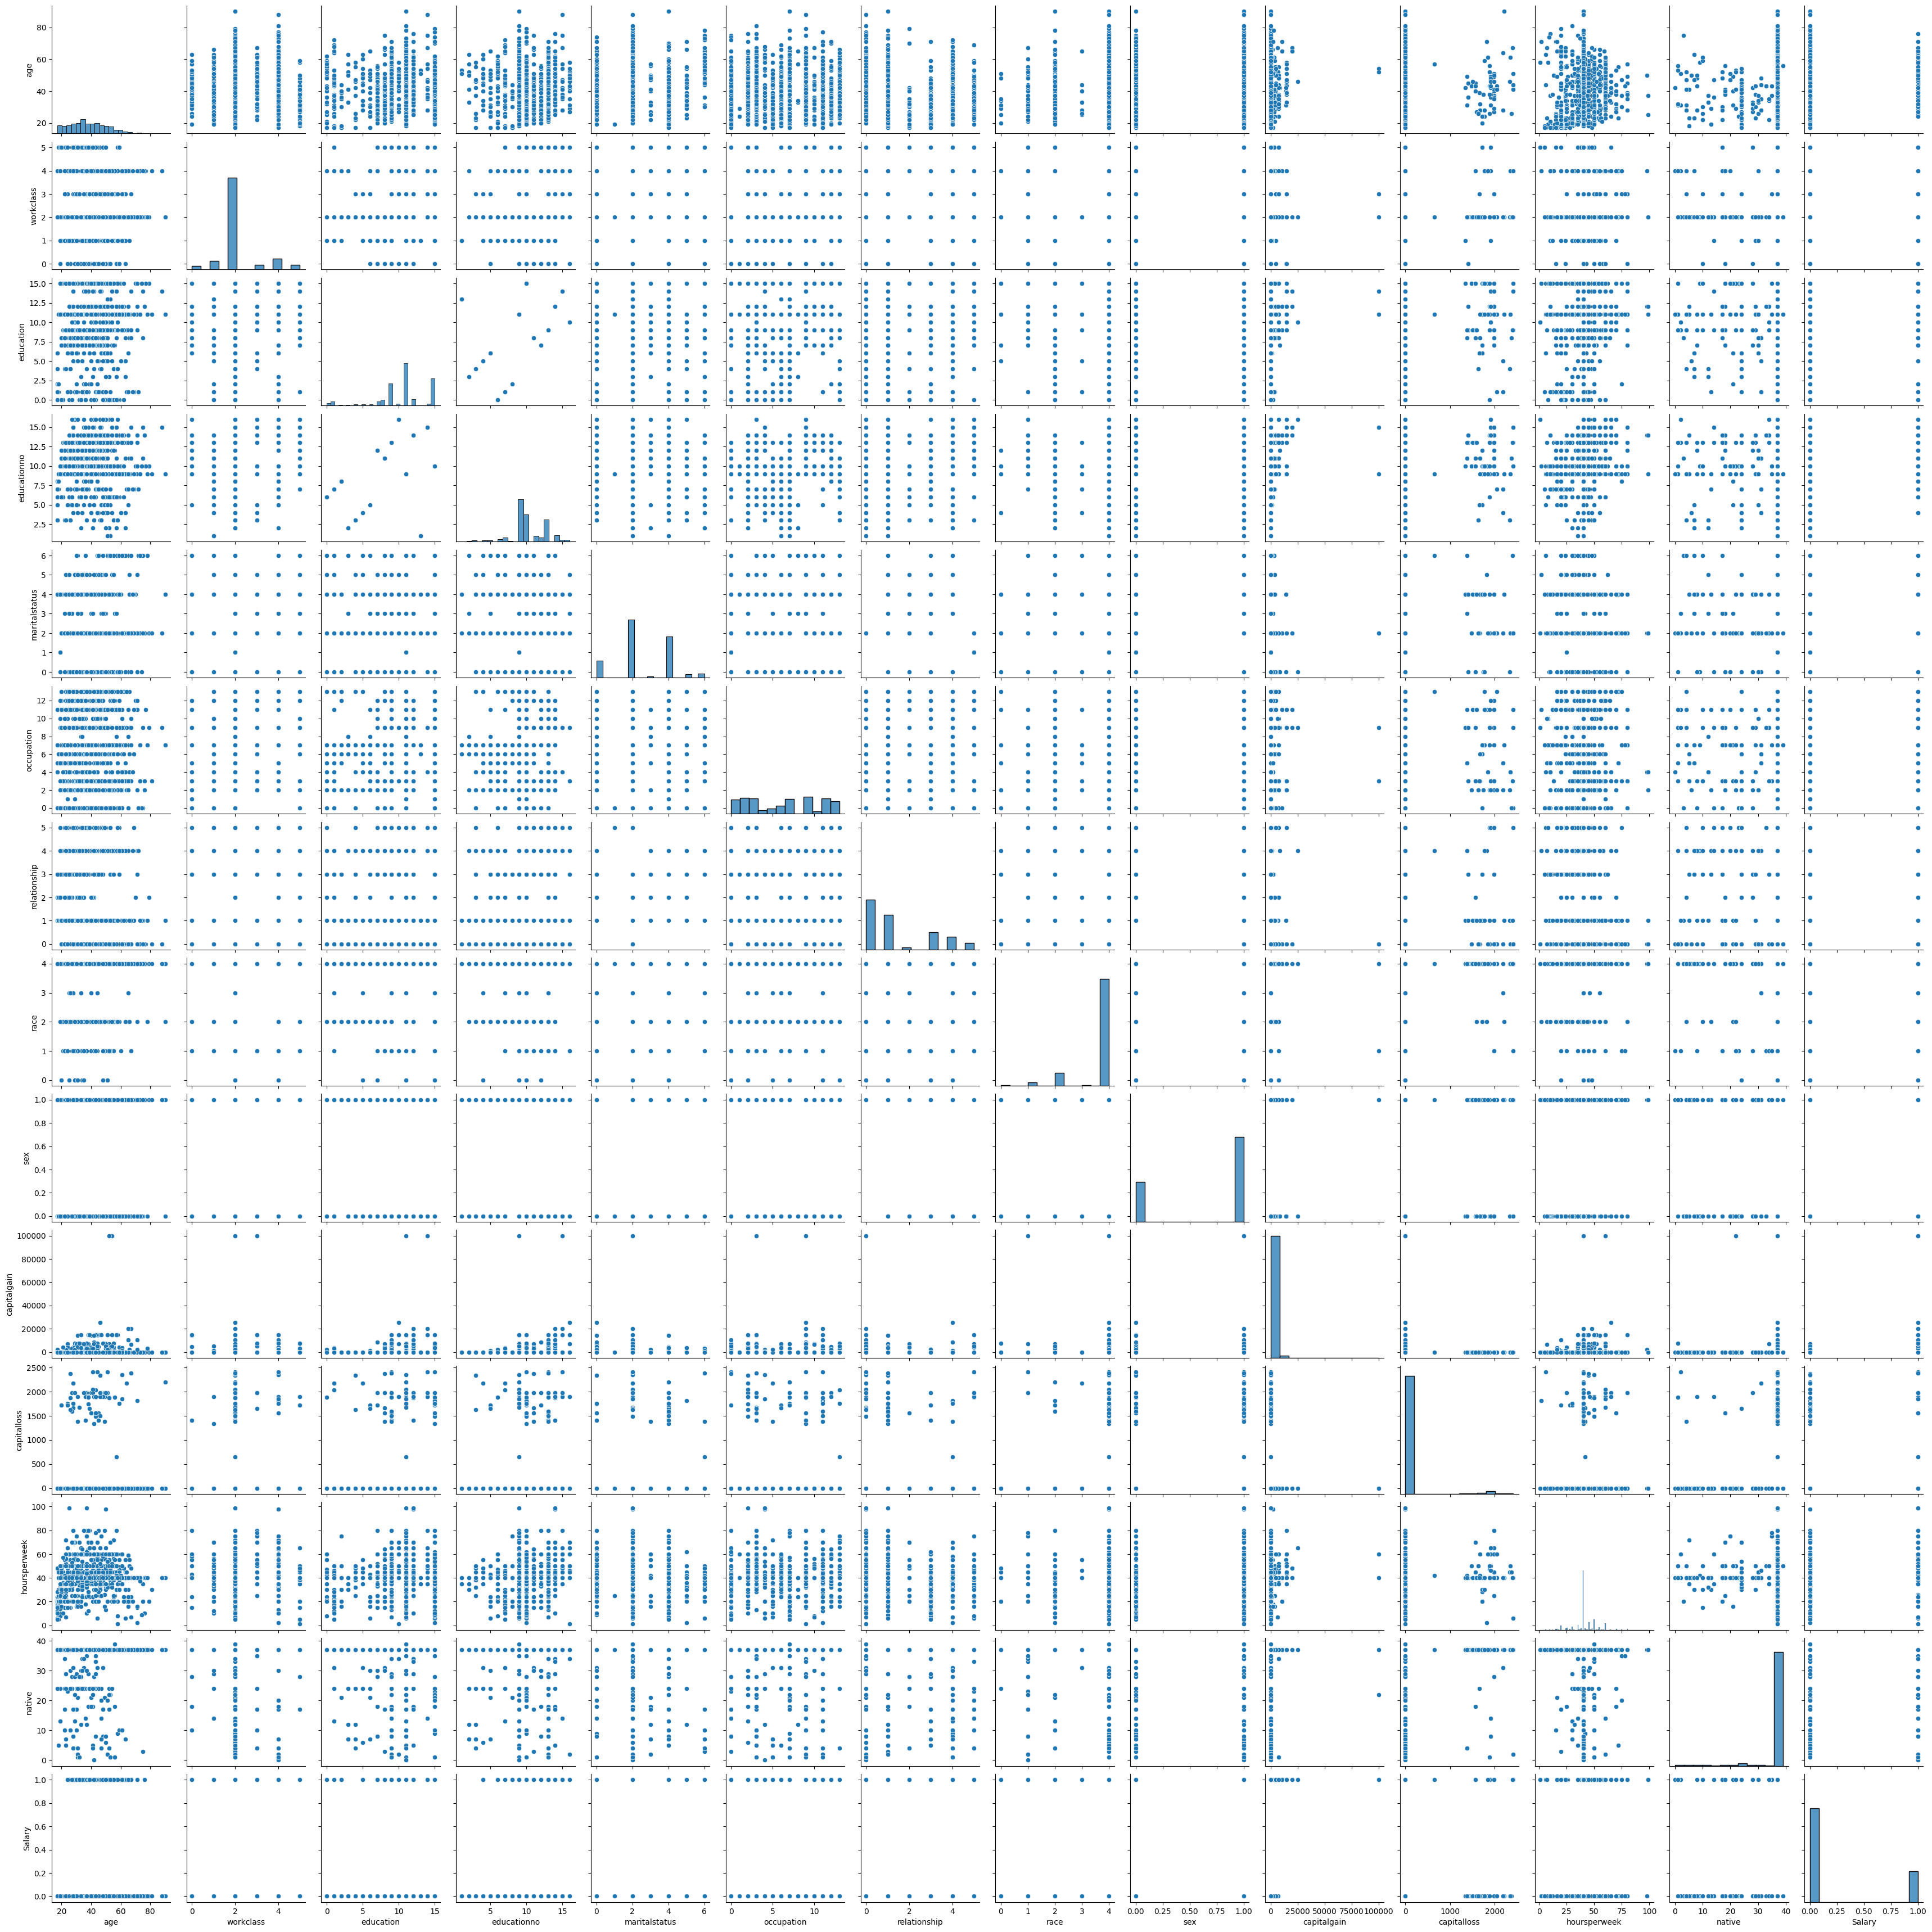

In [34]:
sns.pairplot(test)

In [35]:
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]

In [37]:
x_test=test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [38]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((2000, 13), (2000,), (1300, 13), (1300,))

In [39]:
model = SVC()

model.fit(x_train,y_train)

SVC()

In [40]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
print(confusion_matrix(y_test,y_pred))

[[975   1]
 [273  51]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       976
           1       0.98      0.16      0.27       324

    accuracy                           0.79      1300
   macro avg       0.88      0.58      0.57      1300
weighted avg       0.83      0.79      0.73      1300



In [43]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}


In [44]:
grid = GridSearchCV(SVC(), param_grid,refit = True, verbose = 3, cv = 5)

In [45]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.752 total time=   0.4s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.4s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.2s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.5s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.743 total time=   0.5s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.5s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.7s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.7s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.7s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.5s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.2s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [46]:
grid.best_params_

{'C': 15, 'gamma': 0.001, 'kernel': 'rbf'}

In [47]:
grid_pred = grid.predict(x_test)

In [48]:
grid_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
print(confusion_matrix(y_test,grid_pred))

[[968   8]
 [193 131]]


In [50]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       976
           1       0.94      0.40      0.57       324

    accuracy                           0.85      1300
   macro avg       0.89      0.70      0.74      1300
weighted avg       0.86      0.85      0.82      1300

